In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("/home/andy/Documents/data-bites/yelp_dataset_csv/business_attributes_stars.csv", delimiter=';', header=None)
data = data.rename(columns={0:'business_id',1:'stars',2:'attribute'})

In [20]:
data.attribute.nunique()

96

In [21]:
data_grouped = data.groupby('business_id').agg({'stars':'mean', 'attribute':list})
data_grouped.reset_index()

,business_id,stars,attribute
0,--0r8K_AQ4FZfLsX3ZYRDA,5.0,[BusinessAcceptsCreditCards]
1,--0zrn43LEaB4jUWTQH_Bg,1.0,"[BusinessAcceptsCreditCards, no_WiFi, 3_Restau..."
2,--164t1nclzzmca7eDiJMw,4.0,"[BusinessAcceptsCreditCards, Caters, OutdoorSe..."
3,--2aF9NhXnNVpDV0KS3xBQ,2.5,"[BikeParking, BusinessAcceptsCreditCards, 3_Re..."
4,--2mEJ63SC_8_08_jGgVIg,2.0,"[BikeParking, 2_RestaurantsPriceRange2]"
...,...,...,...
140792,zzoUa7lyeM-qKPKFYSrAhg,3.0,"[BusinessAcceptsCreditCards, Caters, OutdoorSe..."
140793,zzpmoTVq4yn86U7ArHyFBQ,4.0,"[RestaurantsTableService, BikeParking, Busines..."
140794,zzqq8J7Pibxod1YcknlkWA,3.5,"[BikeParking, BusinessAcceptsCreditCards, 2_Re..."
140795,zzwK-TJsCJX5wZrdtKemPg,2.5,"[BusinessAcceptsCreditCards, 2_RestaurantsPric..."


In [195]:
data_grouped_4_5_plus = data_grouped[data_grouped.stars>=4.5]
data_grouped_3_0_minus = data_grouped[data_grouped.stars<=3.0]
data_grouped_validation = data_grouped_4_5_plus[0:10]

In [202]:
from mlxtend.preprocessing import TransactionEncoder

te_top = TransactionEncoder()
te_bot = TransactionEncoder()
te_val = TransactionEncoder()

te_array_top = te_top.fit(data_grouped_4_5_plus.attribute).transform(data_grouped_4_5_plus.attribute)
te_array_bot = te_bot.fit(data_grouped_3_0_minus.attribute).transform(data_grouped_3_0_minus.attribute)
te_array_val = te_val.fit(data_grouped_validation.attribute).transform(data_grouped_validation.attribute)

df_top = pd.DataFrame(te_array_top, columns=te_top.columns_)
df_bot = pd.DataFrame(te_array_bot, columns=te_bot.columns_)
df_val = pd.DataFrame(te_array_val, columns=te_val.columns_)

for column in df_top.columns:
    if df_top[column].sum()<2000:
        df_top.drop(columns=column, inplace=True)

for column in df_bot.columns:
    if df_bot[column].sum()<2000:    
        df_bot.drop(columns=column, inplace=True)

for column in df_val.columns:
    if df_val[column].sum()<4:    
        df_val.drop(columns=column, inplace=True)

df_top = df_top[(df_top).sum(axis=1)>15]
df_bot = df_bot[(df_bot).sum(axis=1)>15]

In [29]:
df_top

,1_RestaurantsPriceRange2,2_RestaurantsPriceRange2,AcceptsInsurance,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,Caters,DogsAllowed,GoodForKids,HasTV,...,RestaurantsTakeOut,WheelchairAccessible,average_NoiseLevel,casual,casual_RestaurantsAttire,free_WiFi,lot,lunch,no_WiFi,street
52,False,True,False,True,True,False,True,False,True,True,...,True,False,True,True,True,True,True,True,False,True
114,True,False,False,True,True,False,True,True,True,True,...,True,True,True,True,True,False,True,True,True,False
249,False,True,False,True,False,False,True,True,True,True,...,True,True,True,True,True,True,False,True,False,True
485,False,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,True,False,False
525,True,False,False,True,True,False,True,False,True,False,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41590,True,False,False,True,True,False,True,False,True,True,...,True,False,True,True,True,False,True,True,True,False
41648,False,True,False,True,True,False,True,True,True,False,...,True,True,True,True,True,False,True,True,True,False
41673,True,False,False,True,True,False,True,True,True,True,...,True,True,True,True,True,True,False,True,False,False
41810,True,False,False,True,True,False,True,True,True,False,...,True,True,True,True,True,True,False,True,False,True


In [30]:
df_bot

,1_RestaurantsPriceRange2,2_RestaurantsPriceRange2,3_RestaurantsPriceRange2,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,Caters,DriveThru,GoodForKids,HappyHour,...,casual,casual_RestaurantsAttire,dinner,free_WiFi,full_bar_Alcohol,lot,lunch,no_WiFi,quiet_NoiseLevel,street
34,False,True,False,True,True,False,True,False,True,False,...,True,True,True,False,False,False,True,True,False,True
54,False,True,False,False,True,False,True,False,True,True,...,True,True,True,False,True,True,True,True,False,False
67,False,True,False,True,True,False,True,False,True,True,...,True,True,True,False,True,True,True,True,False,False
95,False,True,False,True,True,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,True
104,False,True,False,False,True,False,True,False,True,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41406,False,True,False,True,True,False,True,False,True,False,...,True,True,True,False,False,True,True,True,True,False
41420,False,True,False,True,True,False,True,False,True,False,...,True,True,False,True,False,True,True,False,False,False
41442,False,True,False,True,True,False,False,False,True,True,...,True,True,False,True,True,False,True,False,False,False
41460,False,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,False,False,False


In [203]:
df_val

,BikeParking,BusinessAcceptsCreditCards,street
0,False,True,False
1,True,True,False
2,False,False,False
3,True,True,True
4,False,True,False
5,True,True,True
6,False,True,False
7,False,True,True
8,True,True,True
9,True,True,False


In [ ]:
# https://pyshark.com/market-basket-analysis-using-association-rule-mining-in-python/

In [204]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap_top = apriori(df_top, min_support=0.5, use_colnames=True)
frequent_itemsets_ap_bot = apriori(df_bot, min_support=0.5, use_colnames=True)
frequent_itemsets_ap_val = apriori(df_val, min_support=0.5, use_colnames=True)

In [205]:
print(frequent_itemsets_ap_top)
print(frequent_itemsets_ap_bot)
print(frequent_itemsets_ap_val)

       support                                           itemsets
0     0.559859                         (2_RestaurantsPriceRange2)
1     0.957746                                      (BikeParking)
2     0.985915                       (BusinessAcceptsCreditCards)
3     0.883803                                           (Caters)
4     0.973592                                      (GoodForKids)
...        ...                                                ...
8651  0.529930  (BikeParking, average_NoiseLevel, casual, Outd...
8652  0.538732  (BikeParking, average_NoiseLevel, RestaurantsD...
8653  0.551056  (BikeParking, average_NoiseLevel, casual, casu...
8654  0.512324  (average_NoiseLevel, casual, RestaurantsDelive...
8655  0.514085  (average_NoiseLevel, casual, casual_Restaurant...

[8656 rows x 2 columns]
       support                                           itemsets
0     0.733306                         (2_RestaurantsPriceRange2)
1     0.836356                                     

In [208]:
from mlxtend.frequent_patterns import association_rules

rules_ap_top = association_rules(frequent_itemsets_ap_top, metric="confidence", min_threshold=0.9)
rules_ap_bot = association_rules(frequent_itemsets_ap_bot, metric="confidence", min_threshold=0.9)
rules_ap_val = association_rules(frequent_itemsets_ap_val, metric="confidence", min_threshold=0.1)

In [209]:
rules_ap_val

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BikeParking),(BusinessAcceptsCreditCards),0.5,0.9,0.5,1.000000,1.111111,0.05,inf
1,(BusinessAcceptsCreditCards),(BikeParking),0.9,0.5,0.5,0.555556,1.111111,0.05,1.125


In [81]:
rules_ap_top.sort_values('support', ascending=False)
rules_ap_top

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_RestaurantsPriceRange2),(BikeParking),0.559859,0.957746,0.526408,0.940252,0.981733,-0.009795,0.707191
1,(2_RestaurantsPriceRange2),(BusinessAcceptsCreditCards),0.559859,0.985915,0.547535,0.977987,0.991959,-0.004439,0.639839
2,(2_RestaurantsPriceRange2),(GoodForKids),0.559859,0.973592,0.540493,0.965409,0.991595,-0.004581,0.763444
3,(2_RestaurantsPriceRange2),(RestaurantsGoodForGroups),0.559859,0.950704,0.533451,0.952830,1.002236,0.001190,1.045070
4,(2_RestaurantsPriceRange2),(RestaurantsTakeOut),0.559859,0.991197,0.552817,0.987421,0.996191,-0.002114,0.699824
...,...,...,...,...,...,...,...,...,...
90139,"(average_NoiseLevel, RestaurantsTakeOut, Wheel...","(casual_RestaurantsAttire, casual, BusinessAcc...",0.556338,0.890845,0.514085,0.924051,1.037274,0.018474,1.437207
90140,"(average_NoiseLevel, GoodForKids, WheelchairAc...","(casual_RestaurantsAttire, casual, BusinessAcc...",0.558099,0.904930,0.514085,0.921136,1.017909,0.009045,1.205493
90141,"(average_NoiseLevel, BusinessAcceptsCreditCard...","(casual_RestaurantsAttire, casual, GoodForKids...",0.551056,0.896127,0.514085,0.932907,1.041044,0.020268,1.548206
90142,"(average_NoiseLevel, casual, WheelchairAccessi...","(casual_RestaurantsAttire, GoodForKids, Restau...",0.563380,0.897887,0.514085,0.912500,1.016275,0.008232,1.167002


In [82]:
rules_ap_bot.sort_values('support', ascending=False)
rules_ap_bot

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_RestaurantsPriceRange2),(GoodForKids),0.733306,0.918384,0.662407,0.903316,0.983593,-0.011049,0.844154
1,(2_RestaurantsPriceRange2),(HasTV),0.733306,0.927453,0.686727,0.936481,1.009735,0.006621,1.142140
2,(2_RestaurantsPriceRange2),(RestaurantsGoodForGroups),0.733306,0.988046,0.726298,0.990444,1.002427,0.001758,1.250934
3,(2_RestaurantsPriceRange2),(RestaurantsTakeOut),0.733306,0.992993,0.726711,0.991006,0.998000,-0.001457,0.779137
4,(2_RestaurantsPriceRange2),(casual_RestaurantsAttire),0.733306,0.992580,0.727123,0.991568,0.998980,-0.000742,0.879967
...,...,...,...,...,...,...,...,...,...
15248,"(casual, BusinessAcceptsCreditCards, HasTV, Re...","(casual_RestaurantsAttire, GoodForKids, Restau...",0.541632,0.908079,0.515664,0.952055,1.048427,0.023819,1.917206
15249,"(casual, GoodForKids, lunch, RestaurantsGoodFo...","(casual_RestaurantsAttire, HasTV, RestaurantsT...",0.571311,0.913438,0.515664,0.902597,0.988132,-0.006193,0.888706
15250,"(HasTV, GoodForKids, RestaurantsTakeOut, lunch...","(casual_RestaurantsAttire, casual, Restaurants...",0.572547,0.867683,0.515664,0.900648,1.037991,0.018874,1.331795
15251,"(HasTV, GoodForKids, lunch, RestaurantsGoodFor...","(casual_RestaurantsAttire, casual, Restaurants...",0.568013,0.873042,0.515664,0.907837,1.039855,0.019764,1.377544


In [83]:
similar_cols = ['antecedents','consequents']
similarities_top = pd.merge(rules_ap_top[similar_cols], rules_ap_bot[similar_cols], on=similar_cols, how='left', indicator=True)
similarities_bot = pd.merge(rules_ap_bot[similar_cols], rules_ap_top[similar_cols], on=similar_cols, how='left', indicator=True)

In [84]:
rules_ap_top_unique = similarities_top[similarities_top._merge.eq('left_only')]
rules_ap_bot_unique = similarities_bot[similarities_bot._merge.eq('left_only')]

In [85]:
rules_ap_top_unique = rules_ap_top.iloc[rules_ap_top_unique.index]
rules_ap_top_unique.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66612,"(casual, RestaurantsDelivery, GoodForKids, Whe...",(casual_RestaurantsAttire),0.505282,0.991197,0.505282,1.0,1.008881,0.004448,inf
57922,"(BikeParking, casual, lot, RestaurantsTakeOut,...",(casual_RestaurantsAttire),0.558099,0.991197,0.558099,1.0,1.008881,0.004913,inf
31531,"(BikeParking, RestaurantsDelivery, Restaurants...",(casual_RestaurantsAttire),0.568662,0.991197,0.568662,1.0,1.008881,0.005006,inf
57870,"(average_NoiseLevel, casual, BikeParking, Rest...",(casual_RestaurantsAttire),0.691901,0.991197,0.691901,1.0,1.008881,0.006091,inf
57894,"(average_NoiseLevel, BikeParking, lot, Restaur...",(casual_RestaurantsAttire),0.514085,0.991197,0.514085,1.0,1.008881,0.004525,inf
...,...,...,...,...,...,...,...,...,...
4315,"(RestaurantsGoodForGroups, lunch, BusinessAcce...",(average_NoiseLevel),0.845070,0.897887,0.760563,0.9,1.002353,0.001785,1.021127
73429,"(average_NoiseLevel, BikeParking, casual, Rest...","(RestaurantsGoodForGroups, BusinessAcceptsCred...",0.651408,0.913732,0.586268,0.9,0.984971,-0.008945,0.862676
54013,"(casual_RestaurantsAttire, BikeParking, Restau...","(GoodForKids, casual, RestaurantsTakeOut)",0.686620,0.899648,0.617958,0.9,1.000391,0.000242,1.003521
19688,(casual),"(casual_RestaurantsAttire, lunch, GoodForKids,...",0.933099,0.883803,0.839789,0.9,1.018327,0.015114,1.161972


In [86]:
rules_ap_bot_unique = rules_ap_bot.iloc[rules_ap_bot_unique.index]
rules_ap_bot_unique.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12307,"(average_NoiseLevel, HasTV, GoodForKids, Resta...",(casual_RestaurantsAttire),0.518137,0.992580,0.518137,1.0,1.007475,0.003844,inf
4044,"(RestaurantsGoodForGroups, dinner, 2_Restauran...",(casual_RestaurantsAttire),0.508244,0.992580,0.508244,1.0,1.007475,0.003771,inf
11041,"(average_NoiseLevel, dinner, GoodForKids, Rest...",(casual_RestaurantsAttire),0.507420,0.992580,0.507420,1.0,1.007475,0.003765,inf
4073,"(GoodForKids, 2_RestaurantsPriceRange2, dinner...",(casual_RestaurantsAttire),0.507832,0.992580,0.507832,1.0,1.007475,0.003768,inf
12340,"(casual, HasTV, GoodForKids, RestaurantsTakeOu...",(casual_RestaurantsAttire),0.565128,0.992580,0.565128,1.0,1.007475,0.004193,inf
...,...,...,...,...,...,...,...,...,...
6191,"(HasTV, RestaurantsGoodForGroups, dinner, Busi...",(casual),0.605936,0.882523,0.545342,0.9,1.019804,0.010590,1.174773
14451,"(dinner, casual_RestaurantsAttire, GoodForKids...","(BusinessAcceptsCreditCards, RestaurantsTakeOut)",0.564716,0.900660,0.508244,0.9,0.999268,-0.000372,0.993405
5407,"(HasTV, RestaurantsDelivery, BusinessAcceptsCr...",(casual),0.593570,0.882523,0.534213,0.9,1.019804,0.010374,1.174773
3694,"(dinner, RestaurantsTakeOut)","(casual_RestaurantsAttire, casual)",0.729596,0.878401,0.656636,0.9,1.024589,0.015759,1.215993


In [183]:
group_analysis_top = rules_ap_top_unique[rules_ap_top_unique.consequents.eq(frozenset({'RestaurantsGoodForGroups', 'GoodForKids'}))]
group_analysis_bot = rules_ap_bot_unique[rules_ap_bot_unique.consequents.eq(frozenset({'RestaurantsGoodForGroups', 'GoodForKids'}))]

In [184]:
rules_ap_top_unique.iloc[82].consequents

frozenset({'GoodForKids', 'RestaurantsGoodForGroups'})

In [186]:
rules_ap_bot.consequents.eq(frozenset({'RestaurantsGoodForGroups', 'GoodForKids'})).sum()

456

In [187]:
group_analysis_top.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40859,"(casual_RestaurantsAttire, Caters, lunch, free...","(RestaurantsGoodForGroups, GoodForKids)",0.559859,0.927817,0.529930,0.946541,1.020181,0.010483,1.350249
17343,"(Caters, lunch, free_WiFi)","(RestaurantsGoodForGroups, GoodForKids)",0.559859,0.927817,0.529930,0.946541,1.020181,0.010483,1.350249
40694,"(Caters, lunch, free_WiFi, RestaurantsTakeOut)","(RestaurantsGoodForGroups, GoodForKids)",0.556338,0.927817,0.526408,0.946203,1.019816,0.010229,1.341756
66937,"(casual_RestaurantsAttire, free_WiFi, Restaura...","(RestaurantsGoodForGroups, GoodForKids)",0.556338,0.927817,0.526408,0.946203,1.019816,0.010229,1.341756
67042,"(casual, lot, casual_RestaurantsAttire, Caters...","(RestaurantsGoodForGroups, GoodForKids)",0.554577,0.927817,0.524648,0.946032,1.019632,0.010102,1.337510
...,...,...,...,...,...,...,...,...,...
61700,"(average_NoiseLevel, OutdoorSeating, Restauran...","(RestaurantsGoodForGroups, GoodForKids)",0.584507,0.927817,0.526408,0.900602,0.970668,-0.015907,0.726206
77738,"(BikeParking, casual, OutdoorSeating, casual_R...","(RestaurantsGoodForGroups, GoodForKids)",0.584507,0.927817,0.526408,0.900602,0.970668,-0.015907,0.726206
35159,"(WheelchairAccessible, casual, BusinessAccepts...","(RestaurantsGoodForGroups, GoodForKids)",0.619718,0.927817,0.558099,0.900568,0.970631,-0.016887,0.725956
41903,"(casual_RestaurantsAttire, RestaurantsTakeOut,...","(RestaurantsGoodForGroups, GoodForKids)",0.637324,0.927817,0.573944,0.900552,0.970614,-0.017376,0.725841


In [188]:
group_analysis_bot

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
549,(dinner),"(RestaurantsGoodForGroups, GoodForKids)",0.736603,0.90643,0.670239,0.909905,1.003833,0.002559,1.038565
1023,"(casual, 2_RestaurantsPriceRange2)","(RestaurantsGoodForGroups, GoodForKids)",0.653751,0.90643,0.594394,0.909206,1.003062,0.001814,1.030566
1390,"(BikeParking, dinner)","(RestaurantsGoodForGroups, GoodForKids)",0.603462,0.90643,0.546991,0.906421,0.999989,-0.000006,0.999898
1824,"(BusinessAcceptsCreditCards, dinner)","(RestaurantsGoodForGroups, GoodForKids)",0.663644,0.90643,0.605523,0.912422,1.006611,0.003977,1.068420
2555,"(HasTV, dinner)","(RestaurantsGoodForGroups, GoodForKids)",0.679720,0.90643,0.617477,0.908429,1.002205,0.001359,1.021830
...,...,...,...,...,...,...,...,...,...
15114,"(casual, RestaurantsDelivery, casual_Restauran...","(RestaurantsGoodForGroups, GoodForKids)",0.561830,0.90643,0.524320,0.933236,1.029572,0.015060,1.401488
15137,"(average_NoiseLevel, casual, casual_Restaurant...","(RestaurantsGoodForGroups, GoodForKids)",0.611294,0.90643,0.566364,0.926500,1.022142,0.012269,1.273062
15168,"(casual, BusinessAcceptsCreditCards, casual_Re...","(RestaurantsGoodForGroups, GoodForKids)",0.544518,0.90643,0.505359,0.928085,1.023890,0.011791,1.301111
15200,"(casual, lot, casual_RestaurantsAttire, HasTV,...","(RestaurantsGoodForGroups, GoodForKids)",0.543281,0.90643,0.514427,0.946889,1.044635,0.021981,1.761783


In [189]:
import numpy as np

In [190]:
top_ant = dict(group_analysis_top.antecedents)
top_ats = []
for v in top_ant.values():
    top_ats.extend(np.asarray(list(v)) )
top_ats = pd.DataFrame({'attributes':top_ats})
top_ats.value_counts()
top_ats_comp = top_ats.value_counts().reset_index()
top_ats_comp

,attributes,0
0,casual_RestaurantsAttire,708
1,BusinessAcceptsCreditCards,705
2,RestaurantsTakeOut,698
3,BikeParking,635
4,lunch,624
5,casual,605
6,Caters,596
7,average_NoiseLevel,541
8,WheelchairAccessible,506
9,RestaurantsDelivery,357


In [191]:
bot_ant = dict(group_analysis_bot.antecedents)
bot_ats = []
for v in bot_ant.values():
    bot_ats.extend(np.asarray(list(v)) )
bot_ats = pd.DataFrame({'attributes':bot_ats})
bot_ats.value_counts()

attributes                
HasTV                         109
RestaurantsTakeOut             89
casual_RestaurantsAttire       87
dinner                         76
casual                         71
BusinessAcceptsCreditCards     62
average_NoiseLevel             46
lunch                          30
RestaurantsDelivery            29
BikeParking                    25
lot                            20
2_RestaurantsPriceRange2       18
dtype: int64

In [192]:
comparison = pd.merge(top_ats.value_counts().reset_index(), bot_ats.value_counts().reset_index(), on='attributes', how='outer')

In [193]:
comparison.sort_values('0_y', ascending=False)

,attributes,0_x,0_y
15,HasTV,2.0,109.0
2,RestaurantsTakeOut,698.0,89.0
0,casual_RestaurantsAttire,708.0,87.0
16,dinner,NaN,76.0
5,casual,605.0,71.0
1,BusinessAcceptsCreditCards,705.0,62.0
7,average_NoiseLevel,541.0,46.0
4,lunch,624.0,30.0
9,RestaurantsDelivery,357.0,29.0
3,BikeParking,635.0,25.0


In [153]:
data[data.attribute.eq('WheelchairAccessible')][['stars']].value_counts()

stars
4.0      7224
4.5      6643
3.5      4651
5.0      3667
3.0      2462
2.5      1057
2.0       471
1.5       124
1.0        28
dtype: int64

In [161]:
data[data.attribute.eq('HasTV')][['stars']].value_counts()

stars
3.5      8471
4.0      7726
3.0      5711
4.5      3352
2.5      2869
2.0      1590
1.5       583
5.0       411
1.0        70
dtype: int64

In [159]:
data.stars.value_counts()

4.0    252100
3.5    225240
4.5    157803
3.0    142015
2.5     71872
5.0     61649
2.0     36677
1.5     12881
1.0      2274
Name: stars, dtype: int64

In [94]:
rules_ap_top_unique.iloc[0].consequents

frozenset({'BikeParking'})

In [44]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp=fpgrowth(df_true, min_support=0.5, use_colnames=True)

In [45]:
print(frequent_itemsets_fp)


       support                                           itemsets
0     0.991197                         (casual_RestaurantsAttire)
1     0.991197                               (RestaurantsTakeOut)
2     0.985915                       (BusinessAcceptsCreditCards)
3     0.973592                                      (GoodForKids)
4     0.957746                                      (BikeParking)
...        ...                                                ...
8651  0.507042  (Caters, RestaurantsGoodForGroups, average_Noi...
8652  0.508803  (casual_RestaurantsAttire, Caters, Restaurants...
8653  0.507042  (casual_RestaurantsAttire, Caters, Restaurants...
8654  0.503521  (Caters, RestaurantsGoodForGroups, average_Noi...
8655  0.503521  (casual_RestaurantsAttire, Caters, Restaurants...

[8656 rows x 2 columns]


In [46]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)


In [47]:
print(rules_ap)


                                              antecedents  \
0                              (2_RestaurantsPriceRange2)   
1                              (2_RestaurantsPriceRange2)   
2                              (2_RestaurantsPriceRange2)   
3                              (2_RestaurantsPriceRange2)   
4                              (2_RestaurantsPriceRange2)   
...                                                   ...   
238168  (WheelchairAccessible, average_NoiseLevel, Cat...   
238169  (WheelchairAccessible, Caters, lunch, Restaura...   
238170  (WheelchairAccessible, Caters, lunch, average_...   
238171  (WheelchairAccessible, Caters, casual, average...   
238172      (WheelchairAccessible, Caters, lunch, casual)   

                                              consequents  antecedent support  \
0                                           (BikeParking)            0.559859   
1                            (BusinessAcceptsCreditCards)            0.559859   
2                       

In [48]:
print(rules_fp)


                                              antecedents  \
0                              (casual_RestaurantsAttire)   
1                                    (RestaurantsTakeOut)   
2                            (BusinessAcceptsCreditCards)   
3                                    (RestaurantsTakeOut)   
4                              (casual_RestaurantsAttire)   
...                                                   ...   
238168  (Caters, average_NoiseLevel, WheelchairAccessi...   
238169  (Caters, WheelchairAccessible, lunch, BikePark...   
238170  (average_NoiseLevel, RestaurantsGoodForGroups,...   
238171  (WheelchairAccessible, Caters, lunch, average_...   
238172  (WheelchairAccessible, Caters, BikeParking, av...   

                                              consequents  antecedent support  \
0                                    (RestaurantsTakeOut)            0.991197   
1                              (casual_RestaurantsAttire)            0.991197   
2                       

In [210]:
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df_business = pd.read_csv('/home/andy/Documents/data-bites/yelp_dataset_csv/yelp_academic_dataset_business.csv')

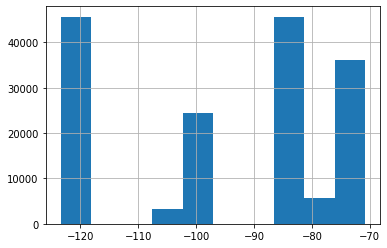

In [275]:
df_business.longitude.hist()
# df_business.latitude.hist()
# df_business.longitude.max()
df_business = df_business[df_business.longitude<=0]

In [276]:
x = df_business[['latitude','longitude','stars']]
x.latitude = (x.latitude + x.latitude.min())
x.latitude = x.latitude / x.latitude.abs().max()
x.longitude = (x.longitude + x.longitude.min())
x.longitude = x.longitude / x.longitude.abs().max()
x.stars = x.stars / 5.0
x

/home/andy/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,latitude,longitude,stars
0,0.877757,-0.926615,0.8
1,0.949656,-0.996756,0.8
2,0.948662,-0.996838,0.9
3,0.734472,-0.829416,0.6
4,0.796836,-0.841805,0.8
...,...,...,...
160580,0.752002,-0.896066,0.8
160581,0.729121,-0.828410,0.9
160582,0.729273,-0.829311,1.0
160583,0.948891,-0.997128,0.8


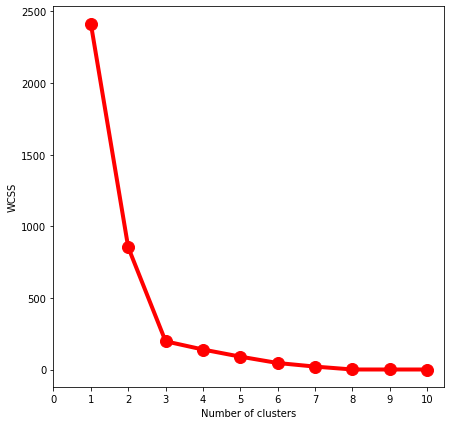

In [278]:
x_2d = x[['longitude','latitude']]
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x_2d)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [310]:
model = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x_2d)

/home/andy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

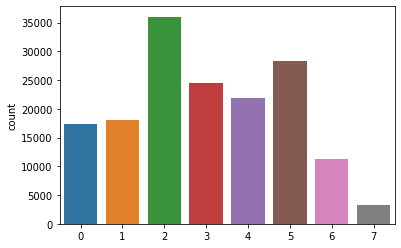

In [311]:
%matplotlib inline
sns.countplot(y_clusters)

In [312]:
print(x[y_clusters == 0].count())
# print(x[y_clusters == 0,1][1])
# print(x[y_clusters == 0,2][1])

latitude     17305
longitude    17305
stars        17305
dtype: int64


In [313]:
x

,latitude,longitude,stars
0,0.877757,-0.926615,0.8
1,0.949656,-0.996756,0.8
2,0.948662,-0.996838,0.9
3,0.734472,-0.829416,0.6
4,0.796836,-0.841805,0.8
...,...,...,...
160580,0.752002,-0.896066,0.8
160581,0.729121,-0.828410,0.9
160582,0.729273,-0.829311,1.0
160583,0.948891,-0.997128,0.8


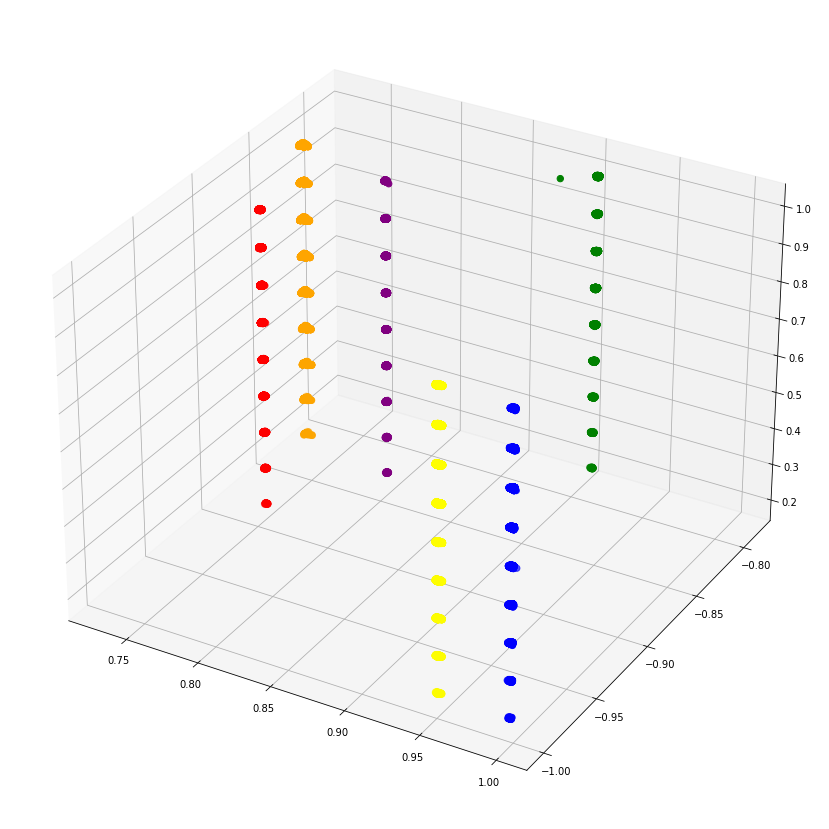

In [287]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0]['latitude'],x[y_clusters == 0]['longitude'],x[y_clusters == 0]['stars'], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1]['latitude'],x[y_clusters == 1]['longitude'],x[y_clusters == 1]['stars'], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2]['latitude'],x[y_clusters == 2]['longitude'],x[y_clusters == 2]['stars'], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3]['latitude'],x[y_clusters == 3]['longitude'],x[y_clusters == 3]['stars'], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(x[y_clusters == 4]['latitude'],x[y_clusters == 4]['longitude'],x[y_clusters == 4]['stars'], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5]['latitude'],x[y_clusters == 5]['longitude'],x[y_clusters == 5]['stars'], s = 40 , color = 'yellow', label = "cluster 5")

plt.show()

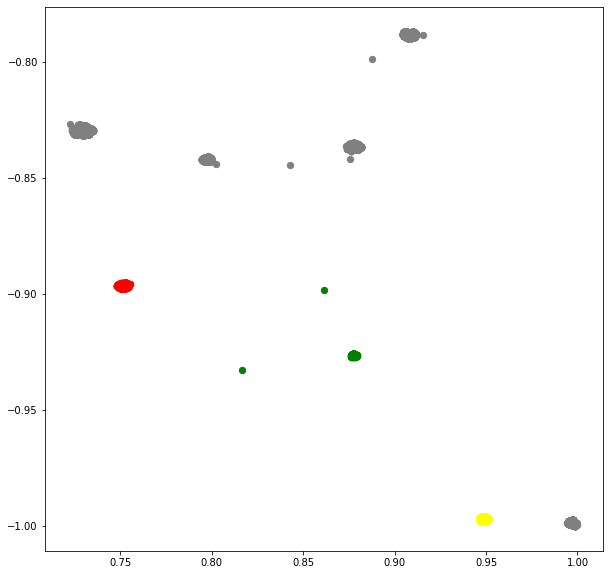

In [354]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(x[y_clusters == 0]['latitude'],x[y_clusters == 0]['longitude'], s = 40 , color = 'grey', label = "cluster 0")
ax.scatter(x[y_clusters == 1]['latitude'],x[y_clusters == 1]['longitude'], s = 40 , color = 'grey', label = "cluster 1") #orange
ax.scatter(x[y_clusters == 2]['latitude'],x[y_clusters == 2]['longitude'], s = 40 , color = 'grey', label = "cluster 2") #green
ax.scatter(x[y_clusters == 3]['latitude'],x[y_clusters == 3]['longitude'], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(x[y_clusters == 4]['latitude'],x[y_clusters == 4]['longitude'], s = 40 , color = 'grey', label = "cluster 4") #purple
ax.scatter(x[y_clusters == 5]['latitude'],x[y_clusters == 5]['longitude'], s = 40 , color = 'yellow', label = "cluster 5")
ax.scatter(x[y_clusters == 6]['latitude'],x[y_clusters == 6]['longitude'], s = 40 , color = 'grey', label = "cluster 6") #blue
ax.scatter(x[y_clusters == 7]['latitude'],x[y_clusters == 7]['longitude'], s = 40 , color = 'green', label = "cluster 7")

# ax.scatter(x_2d.latitude, x_2d.longitude)
plt.show()

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1
6 3 0
7 3 1


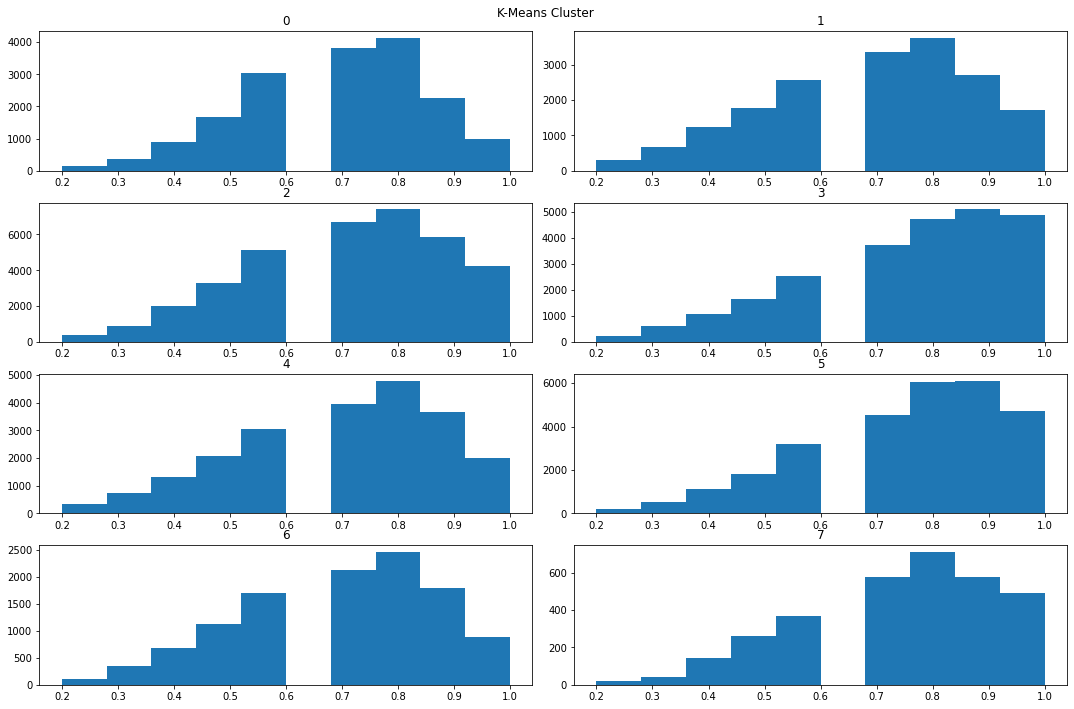

In [350]:
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
figure.tight_layout()
figure.suptitle('K-Means Cluster')
figure.tight_layout()
for i in range(8):
    col = i%2
    row = i//2
    axes[row][col].hist(x[y_clusters==i].stars)
    axes[row][col].set_title(i)
    print(i, row,col)
    # stateBreakDown = dfTrain[dfTrain['State ID'].eq(summary_active.index.values[i])][['Day','Active']]
    # axes[row][col].plot(stateBreakDown['Day'], stateBreakDown['Active'])
    # axes[row][col].set_title('StateID: '+ stateDict[summary_active.index.values[i]] )

# for i in range(13):
#     print(i)
#     plt.subplot()
#     x[y_clusters == i].stars.hist()

In [297]:
x[y_clusters==0].stars.value_counts()

0.8    4134
0.7    3824
0.6    3030
0.9    2250
0.5    1678
1.0     998
0.4     896
0.3     359
0.2     136
Name: stars, dtype: int64

In [370]:
np.in1d(y_clusters, [3,5,7])

array([ True,  True,  True, ..., False,  True, False])

In [373]:
df_business[ np.in1d(y_clusters, [3,5,7]) ][['city']].value_counts()[0:10]

city       
Austin         22415
Portland       18203
Vancouver       3028
Boulder         2542
Beaverton       2252
Tigard           916
Lake Oswego      761
Clackamas        484
Milwaukie        456
Tualatin         412
dtype: int64